### 4개의 입력데이터 연산 (A1-A2+A3-A4) 예측하는 Linear Regression 예제
#### epochs 을 기존의 2배로 늘리고 손실함수 추이를 나타내는 그래프 그리기

In [1]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


# 수치미분 코드
def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        
        x[idx] = tmp_val - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad

In [2]:
try:
    loaded_data = np.loadtxt('./(200224)sps.csv', delimiter=',', dtype=np.float32)
    
    x_data = loaded_data[ :, 1:]
    t_data = loaded_data[ :, [0]]

    # 데이터 차원 및 shape 확인
    print("loaded_data.ndim = ", loaded_data.ndim, ", loaded_data.shape = ", loaded_data.shape)
    print("x_data.ndim = ", x_data.ndim, ", x_data.shape = ", x_data.shape)
    print("t_data.ndim = ", t_data.ndim, ", t_data.shape = ", t_data.shape) 
    
except FileNotFoundError as err:
    print(str(err))
except Exception as err:
    print(str(err))

loaded_data.ndim =  2 , loaded_data.shape =  (50, 5)
x_data.ndim =  2 , x_data.shape =  (50, 4)
t_data.ndim =  2 , t_data.shape =  (50, 1)


In [3]:
np.random.seed(0)

W = np.random.rand(x_data.shape[-1], 1)  # 4X1 행렬
b = np.random.rand(1)  
print("W = ", W, ", W.shape = ", W.shape, ", b = ", b, ", b.shape = ", b.shape)

W =  [[0.5488135 ]
 [0.71518937]
 [0.60276338]
 [0.54488318]] , W.shape =  (4, 1) , b =  [0.4236548] , b.shape =  (1,)


In [4]:
# 손실함수

def loss_func(x, t):
    y = np.dot(x,W) + b
    
    return ( np.sum( (t - y)**2 ) ) / ( len(x) )

In [5]:
# 손실함수 값 계산 함수
# 입력변수 x, t : numpy type
def error_val(x, t):
    y = np.dot(x,W) + b
    
    return ( np.sum( (t - y)**2 ) ) / ( len(x) )

# 학습을 마친 후, 임의의 데이터에 대해 미래 값 예측 함수
# 입력변수 x : numpy type
def predict(x):
    y = np.dot(x,W) + b
    
    return y

In [6]:
learning_rate = 1e-3   

f = lambda x : loss_func(x_data,t_data)

print("Initial error value = ", error_val(x_data, t_data), "Initial W = ", W, "\n", ", b = ", b )

loss_val_list = []

start_time = datetime.now()

for step in  range(40001):    # 4만번 반복수행
    
    W -= learning_rate * numerical_derivative(f, W)
    
    b -= learning_rate * numerical_derivative(f, b)
    
    if (step % 1000 == 0):
        print("step = ", step, "error value = ", error_val(x_data, t_data) )
        loss_val_list.append(error_val(x_data, t_data))
        
end_time = datetime.now()
        
print("")
print("Elapsed Time => ", end_time - start_time)

Initial error value =  64.38302549674624 Initial W =  [[0.5488135 ]
 [0.71518937]
 [0.60276338]
 [0.54488318]] 
 , b =  [0.4236548]
step =  0 error value =  60.604776072341444
step =  1000 error value =  0.004047845907167936
step =  2000 error value =  0.00048722369128301977
step =  3000 error value =  5.864524808192556e-05
step =  4000 error value =  7.0589037112171215e-06
step =  5000 error value =  8.496531813563435e-07
step =  6000 error value =  1.0226949652836696e-07
step =  7000 error value =  1.230978727513882e-08
step =  8000 error value =  1.4816819081469759e-09
step =  9000 error value =  1.7834437166114527e-10
step =  10000 error value =  2.1466628382414438e-11
step =  11000 error value =  2.583855772566766e-12
step =  12000 error value =  3.1100881478795545e-13
step =  13000 error value =  3.7434938904037783e-14
step =  14000 error value =  4.5059000875171345e-15
step =  15000 error value =  5.423579204531311e-16
step =  16000 error value =  6.528154409141282e-17
step =  1

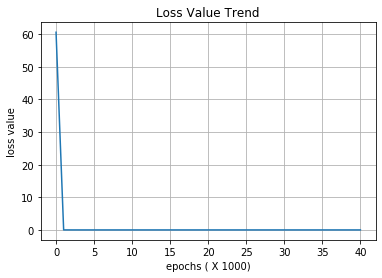

In [7]:
plt.title('Loss Value Trend')
plt.xlabel('epochs ( X 1000)')
plt.ylabel('loss value')
plt.grid()

plt.plot(loss_val_list)

plt.show()

In [8]:
ex_data_01 = np.array([4, 4, 4, 4])    #  4 - 4 + 4 - 4 = 0

print("predicted value = ", predict(ex_data_01) ) 

predicted value =  [-3.2762613e-14]


In [9]:
ex_data_02 = np.array([-3, 0, 9, -1])    #  -3 -0 +9 -(-1) = 7

print("predicted value = ", predict(ex_data_02) ) 

predicted value =  [7.]


In [11]:
ex_data_03 = np.array([-7, -9, -2, 8])   # -7 -(-9) + (-2) -8 = -8

print("predicted value = ", predict(ex_data_03) ) 

predicted value =  [-8.]


In [12]:
ex_data_04 = np.array([1, -2, 3, -2])   # 1 -(-2) + 3 -(-2) = 8

print("predicted value = ", predict(ex_data_04) ) 

predicted value =  [8.]


In [13]:
ex_data_05 = np.array([19, -12, 0, -76])   # 19 -(-12) + 0 -(-76) = 107

print("predicted value = ", predict(ex_data_05) ) 

predicted value =  [107.]


In [14]:
ex_data_06 = np.array([2001, -1, 109, 31])   # 2001 -(-1) + 109 -(31) = 2080

print("predicted value = ", predict(ex_data_06) ) 

predicted value =  [2080.]


In [15]:
ex_data_07 = np.array([-1, 102, -200 , 1000])   # -1 -(102) + (-200) -(1000) = -1303

print("predicted value = ", predict(ex_data_07) ) 

predicted value =  [-1303.]
